In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ecommerce_consumers.csv')
df.head()

,ratio,time,label
0,0.54,17.2,female
1,0.93,18.2,male
2,0.84,13.6,female
3,0.19,6.0,male
4,0.89,13.2,female


In [4]:
df.shape

(200, 3)

In [6]:
df['label'] = df['label'].map({"female":0,"male":1})

In [8]:
X = df.drop('label',axis=1)
y = df['label']

In [9]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [28]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((140, 2), (60, 2), (140,), (60,))

### Logistic Regression

In [22]:
import statsmodels.api as sm

In [41]:
X_train_sm = sm.add_constant(X_train)
# y_train=np.array(y_train).reshape(-1,1)
logr1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

In [42]:
logr1 = logr1.fit()

In [51]:
y_train_pred=logr1.predict(X_train_sm)
y_test_pred=logr1.predict(sm.add_constant(X_test))
# y_train_pred
y_train_pred.values

array([0.66217395, 0.67032761, 0.65551753, 0.66124075, 0.66693859,
       0.66259009, 0.66189343, 0.65566121, 0.66021062, 0.65058008,
       0.64784902, 0.6494893 , 0.66502266, 0.67711536, 0.67174255,
       0.67593509, 0.66282152, 0.67525247, 0.66582826, 0.66734762,
       0.66507361, 0.66061753, 0.66882159, 0.65687784, 0.67825811,
       0.67082075, 0.67358862, 0.65759653, 0.64881245, 0.67312297,
       0.66808711, 0.65787645, 0.66472223, 0.65935591, 0.66764267,
       0.6584789 , 0.6581137 , 0.67417294, 0.67211295, 0.66527432,
       0.65547675, 0.64964276, 0.65673867, 0.65483758, 0.67046214,
       0.65717083, 0.66592966, 0.65241691, 0.66329873, 0.67197498,
       0.65748306, 0.66591474, 0.65829748, 0.66247781, 0.66449796,
       0.67470463, 0.67864755, 0.66092401, 0.67757392, 0.67569168,
       0.6728868 , 0.67684947, 0.66318234, 0.66009796, 0.66991017,
       0.66455509, 0.67266947, 0.66392413, 0.65472368, 0.6600447 ,
       0.66405958, 0.65700613, 0.66450218, 0.67255851, 0.65554

In [52]:
y_train_final = pd.DataFrame({
    "actual": y_train.values,
    "predicted": y_train_pred.values
})
y_train_final

,actual,predicted
0,0,0.662174
1,1,0.670328
2,1,0.655518
3,1,0.661241
4,0,0.666939
...,...,...
135,1,0.659510
136,0,0.663070
137,1,0.674434
138,1,0.673271


In [53]:
y_train_final['predicted'] = y_train_final.predicted.map(lambda x: 1 if x > 0.5 else 0)

In [54]:
y_train_final

,actual,predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
135,1,1
136,0,1
137,1,1
138,1,1


In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_train_final.actual,y_train_final.predicted)

0.6642857142857143

##### Accuracy for Logistic Regression is 66.42%

### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dt = DecisionTreeClassifier(max_depth=3)

In [86]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [87]:
from IPython.display import Image
from six import StringIO 
import graphviz,pydotplus
from sklearn.tree import export_graphviz


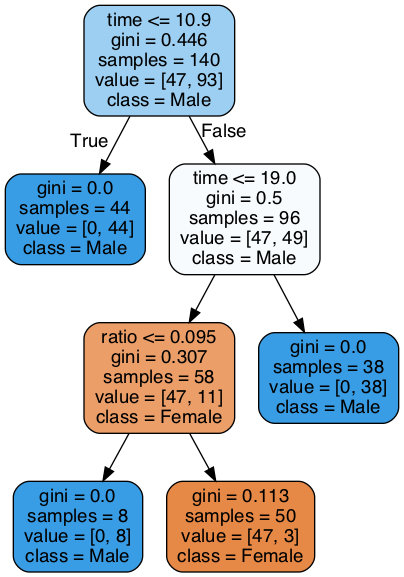

In [88]:
io = StringIO()
export_graphviz(dt,out_file=io,feature_names=X_train.columns,filled=True,rounded=True,class_names=['Female','Male'])
graph = pydotplus.graph_from_dot_data(io.getvalue())
Image(graph.create_png())

In [89]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [90]:
accuracy_score(y_train,y_train_pred)

0.9785714285714285

In [91]:
accuracy_score(y_test,y_test_pred)

0.95

Accuracy score for decision tree is 95%


### SVM Model

In [92]:
from sklearn.svm import SVC

In [121]:
svm = SVC(kernel='rbf')

In [122]:
svm.fit(X_train,y_train)

SVC()

In [123]:
y_pred = svm.predict(X_test)

In [124]:
accuracy_score(y_test,y_pred)

0.8666666666666667